Importing all the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, balanced_accuracy_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

Loading the dataset and performing EDA.

In [2]:
train = pd.read_csv("E:/Engineering/TnP/Projects/DataScience/CreditCardLead/dataset/train_s3TEQDk.csv")
train

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [3]:
train = pd.DataFrame(train)
train

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [4]:
train.shape

(245725, 11)

In [5]:
train_dup = train.head(5000)

In [6]:
train_dup['Serial_Number'] = range(1, len(train_dup) + 1)

In [7]:
train_dup.tail()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Serial_Number
4995,TGSTUMW4,Male,29,RG268,Salaried,X1,14,No,7009613,Yes,0,4996
4996,GMZPF4PM,Female,77,RG268,Other,X2,81,No,1152478,Yes,0,4997
4997,K2SVPEZN,Female,26,RG271,Self_Employed,X1,21,No,752112,No,0,4998
4998,HJJGTSEL,Male,54,RG268,Self_Employed,X3,55,Yes,1693260,No,0,4999
4999,JXWJS5XF,Male,44,RG268,Self_Employed,X3,55,Yes,752076,No,0,5000


In [8]:
train_dup.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead,Serial_Number
count,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000
mean,43.774000,46.270200,1.110492e+06,0.242000,2500.500000
std,14.791385,32.030373,8.053884e+05,0.428337,1443.520003
min,24.000000,7.000000,8.616900e+04,0.000000,1.000000
25%,30.000000,20.000000,6.015285e+05,0.000000,1250.750000
50%,43.000000,32.000000,8.918640e+05,0.000000,2500.500000
75%,54.000000,73.000000,1.369456e+06,0.000000,3750.250000
max,85.000000,135.000000,8.256124e+06,1.000000,5000.000000


In [9]:
train_dup.isnull().sum()

ID                       0
Gender                   0
Age                      0
Region_Code              0
Occupation               0
Channel_Code             0
Vintage                  0
Credit_Product         592
Avg_Account_Balance      0
Is_Active                0
Is_Lead                  0
Serial_Number            0
dtype: int64

In [10]:
train_dup.shape

(5000, 12)

In [11]:
train_dup.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead', 'Serial_Number'],
      dtype='object')

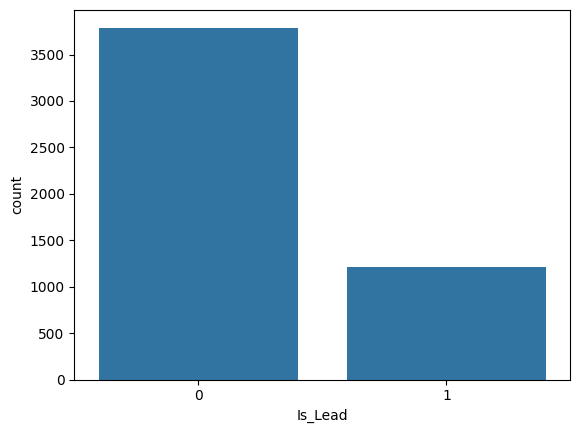

In [12]:
sns.countplot(x='Is_Lead', data=train_dup)
plt.show()

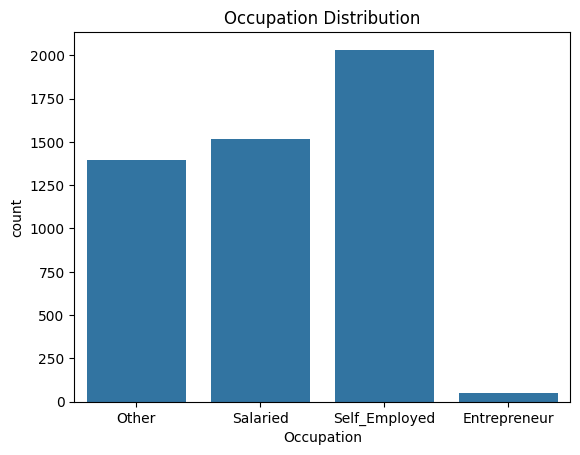

In [13]:
sns.countplot(data=train_dup, x='Occupation')
plt.title('Occupation Distribution')
plt.show()

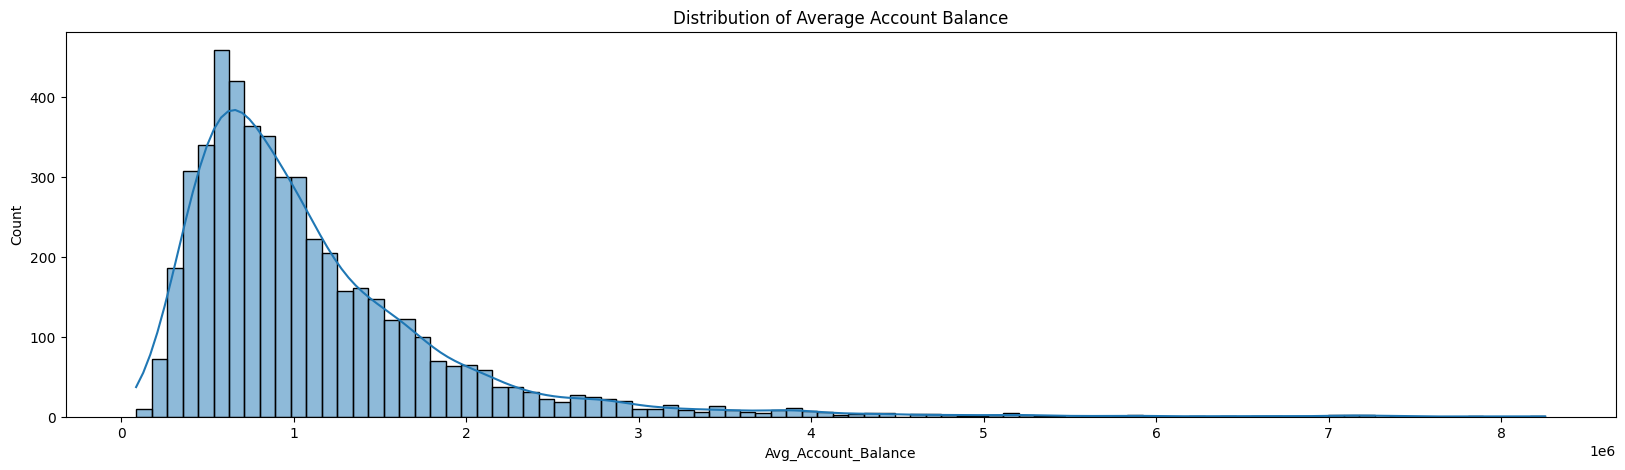

In [14]:
plt.figure(figsize=(20, 5))
sns.histplot(train_dup['Avg_Account_Balance'], kde=True)
plt.title('Distribution of Average Account Balance')
plt.show()

Is_Lead           0    1
Occupation              
Entrepreneur     19   33
Other          1034  363
Salaried       1261  257
Self_Employed  1476  557



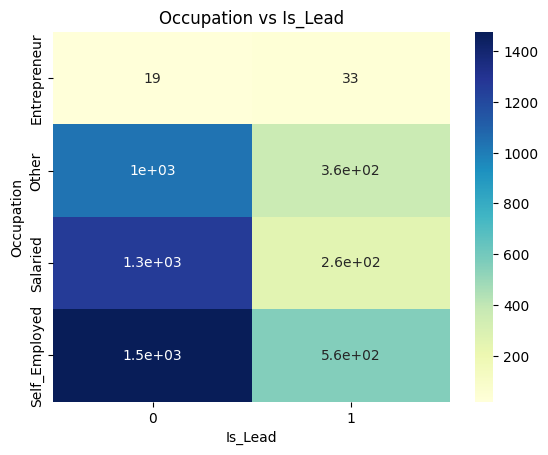

In [15]:
occupation_vs_lead = pd.crosstab(train_dup['Occupation'], train_dup['Is_Lead'])
print(occupation_vs_lead)
print("")

sns.heatmap(occupation_vs_lead, annot=True, cmap="YlGnBu")
plt.title('Occupation vs Is_Lead')
plt.show()

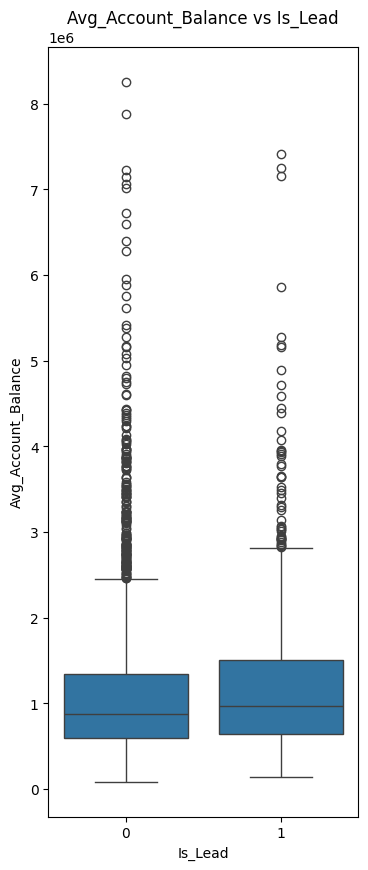

In [16]:
plt.figure(figsize=(4, 10))
sns.boxplot(x='Is_Lead', y='Avg_Account_Balance', data=train_dup)
plt.title('Avg_Account_Balance vs Is_Lead')
plt.show()

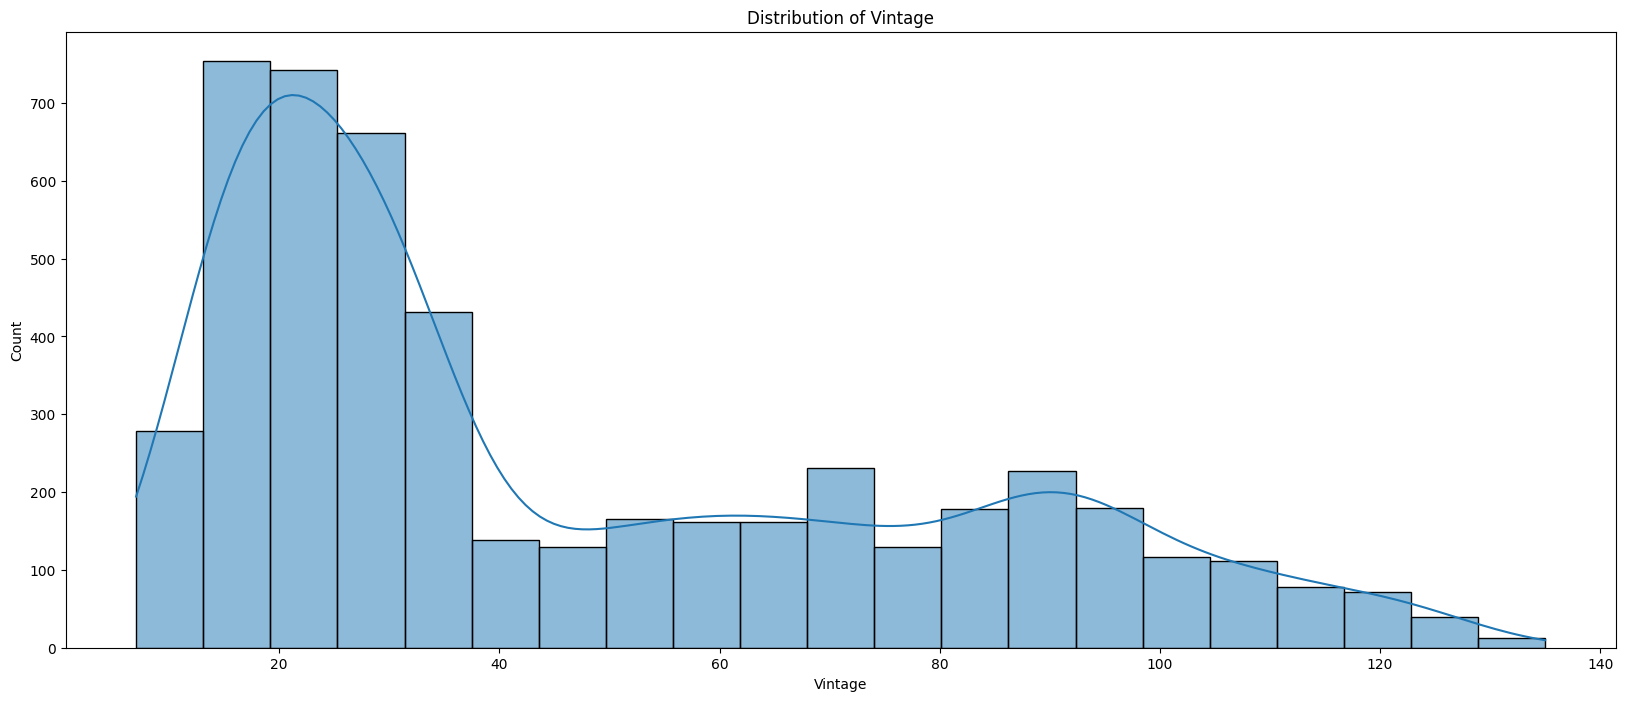

In [17]:
plt.figure(figsize=(20, 8))
sns.histplot(train_dup['Vintage'], kde=True)
plt.title('Distribution of Vintage')
plt.show()

In [18]:
lead_true = train_dup[train_dup['Is_Lead'] == 1]['Avg_Account_Balance']
lead_false = train_dup[train_dup['Is_Lead'] == 0]['Avg_Account_Balance']

print(lead_true)
count_lead_true = len(lead_true)

print("")
print(lead_false)
count_lead_false = len(lead_false)

6       1056750
15       517063
16      2282502
17      2384692
20      1001650
         ...   
4985     706624
4988    1817647
4989     335111
4991    1060888
4992    1205549
Name: Avg_Account_Balance, Length: 1210, dtype: int64

0       1045696
1        581988
2       1484315
3        470454
4        886787
         ...   
4995    7009613
4996    1152478
4997     752112
4998    1693260
4999     752076
Name: Avg_Account_Balance, Length: 3790, dtype: int64


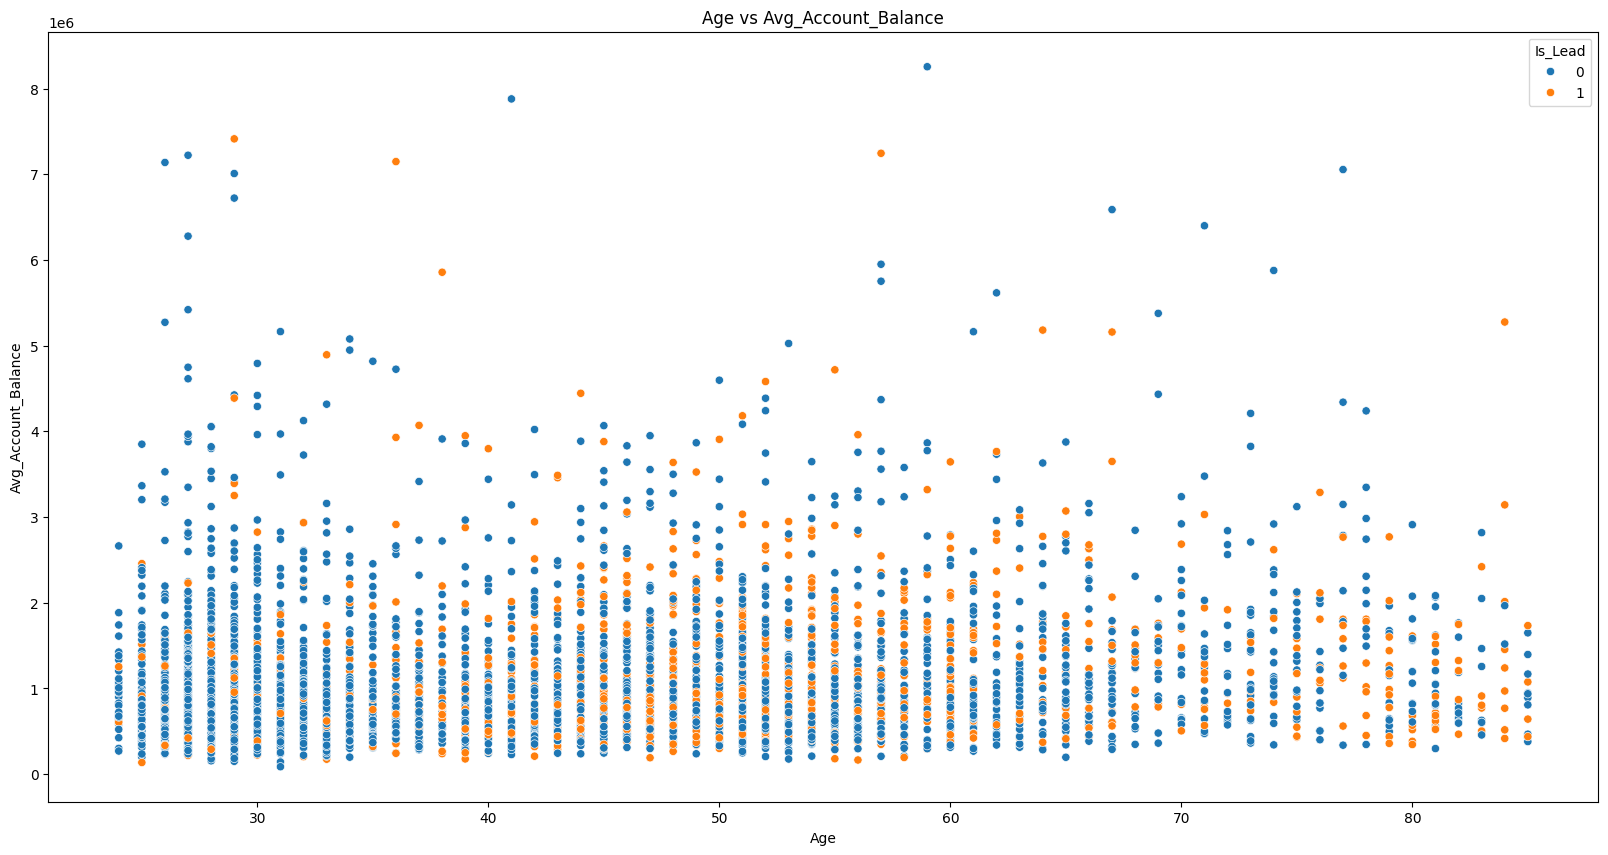

In [19]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Age', y='Avg_Account_Balance', hue='Is_Lead', data=train_dup)
plt.title('Age vs Avg_Account_Balance')
plt.show()

In [20]:
correlation_matrix = train_dup[['Age', 'Avg_Account_Balance']].corr()
print(correlation_matrix)

                         Age  Avg_Account_Balance
Age                  1.00000              0.14089
Avg_Account_Balance  0.14089              1.00000


Is_Lead          0    1
Channel_Code           
X1            1935  192
X2             893  471
X3             878  517
X4              84   30



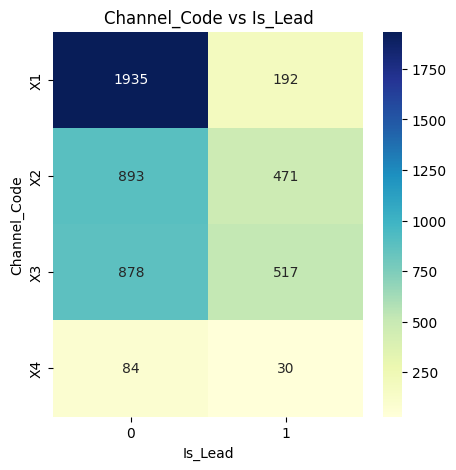

In [21]:
channel_vs_lead = pd.crosstab(train_dup['Channel_Code'], train_dup['Is_Lead'])
print(channel_vs_lead)
print("")
plt.figure(figsize=(5, 5))
sns.heatmap(channel_vs_lead, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Channel_Code vs Is_Lead')
plt.show()

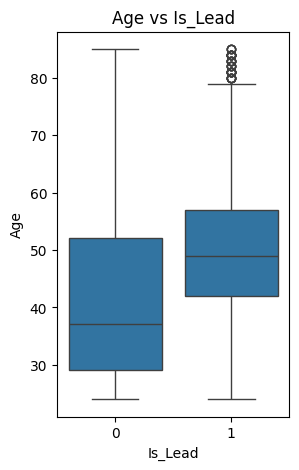

In [22]:
plt.figure(figsize=(3, 5))
sns.boxplot(x='Is_Lead', y='Age', data=train_dup)
plt.title('Age vs Is_Lead')
plt.show()

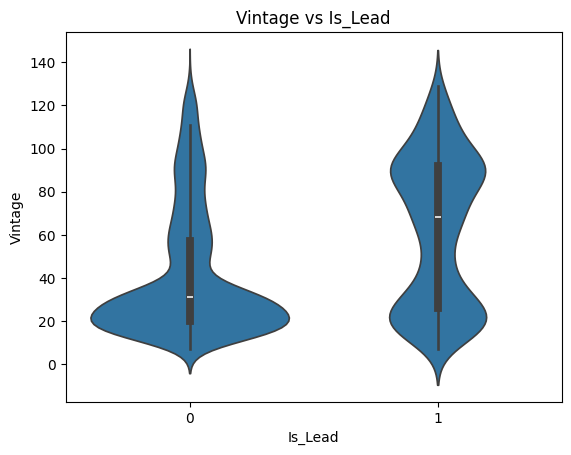

In [23]:
sns.violinplot(x='Is_Lead', y='Vintage', data=train_dup)
plt.title('Vintage vs Is_Lead')
plt.show()

<Figure size 1200x800 with 0 Axes>

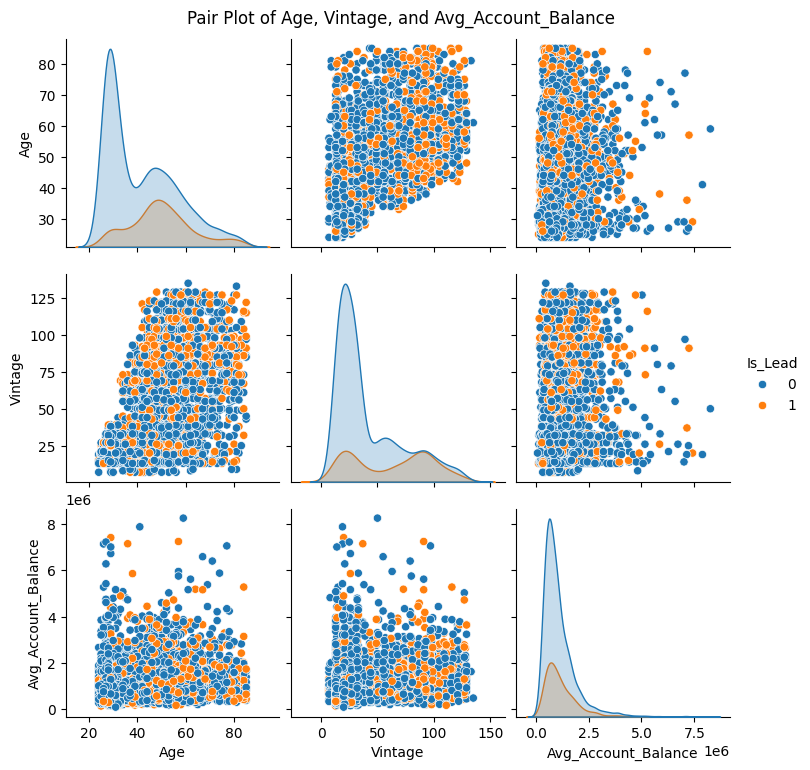

In [24]:
plt.figure(figsize=(12, 8))
sns.pairplot(train_dup, hue='Is_Lead', vars=['Age', 'Vintage', 'Avg_Account_Balance'])
plt.suptitle('Pair Plot of Age, Vintage, and Avg_Account_Balance', y=1.02)
plt.show()

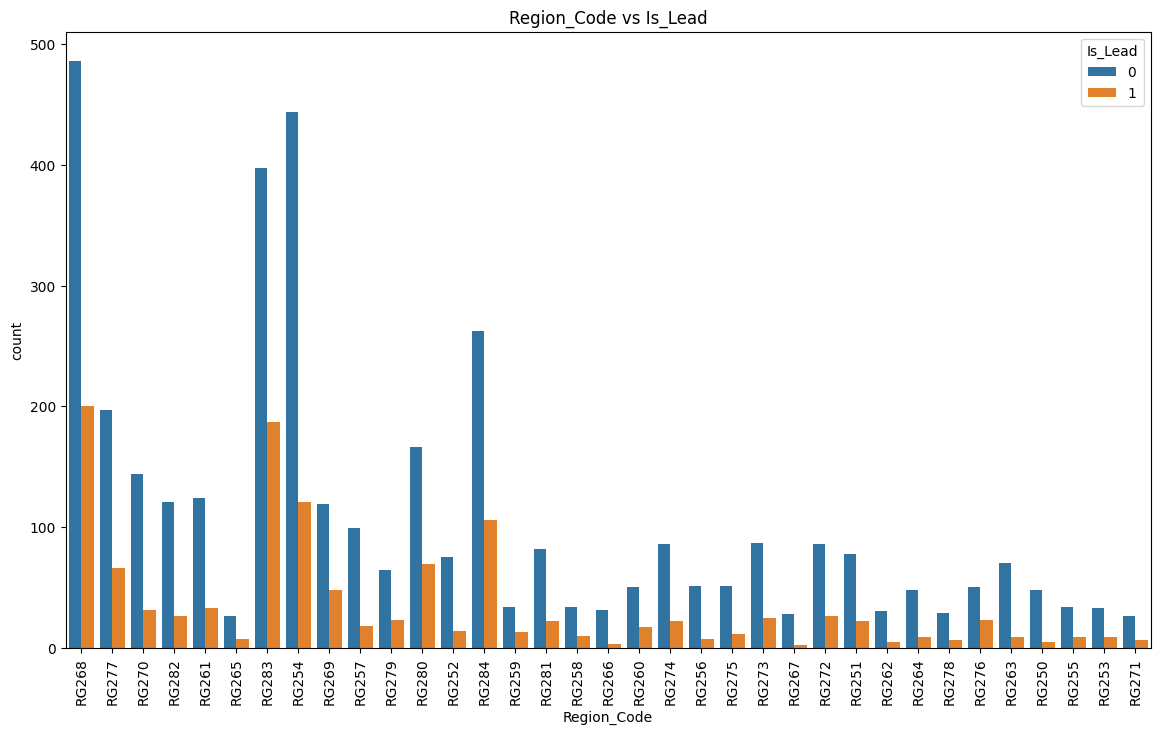

In [25]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Region_Code', hue='Is_Lead', data=train_dup)
plt.title('Region_Code vs Is_Lead')
plt.xticks(rotation=90)
plt.show()

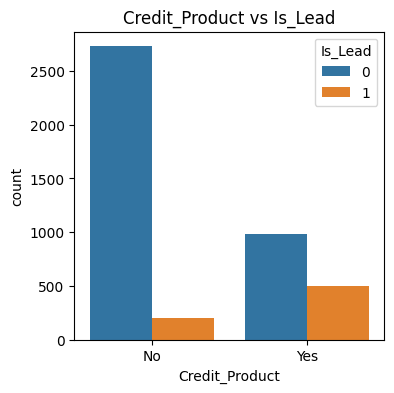

In [26]:
plt.figure(figsize=(4, 4))
sns.countplot(x='Credit_Product', hue='Is_Lead', data=train_dup)
plt.title('Credit_Product vs Is_Lead')
plt.show()

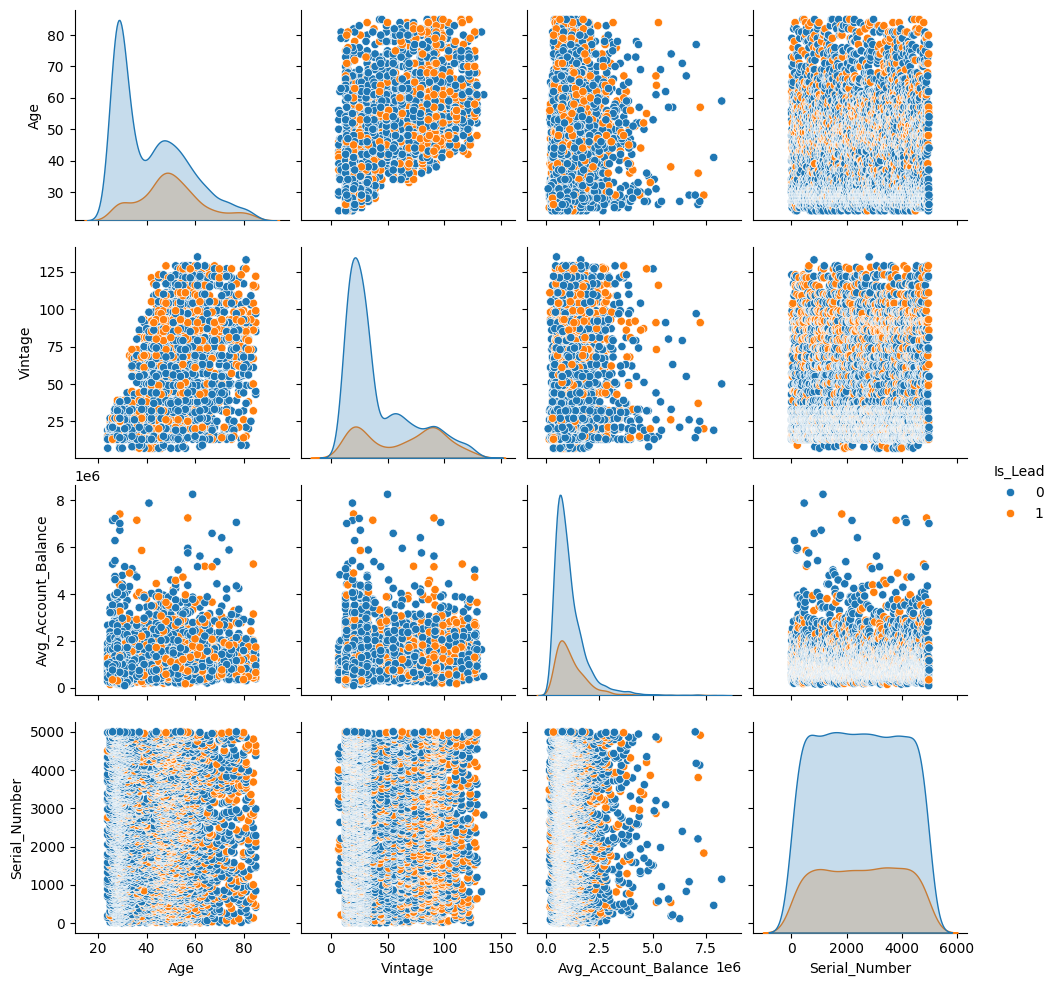

In [27]:
sns.pairplot(train_dup, hue='Is_Lead')
plt.show()

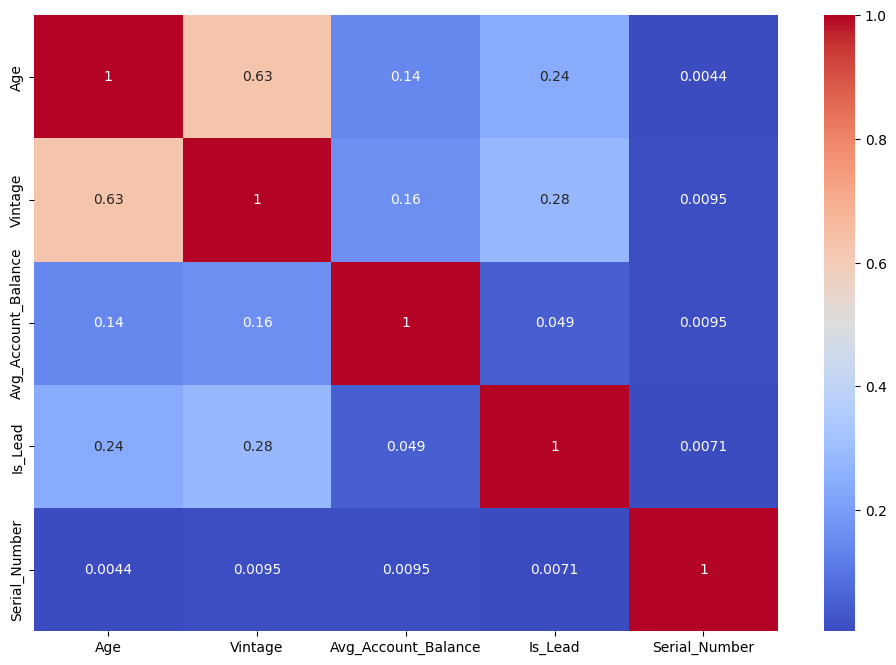

In [28]:
numeric_train_dup = train_dup.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_train_dup.corr(), annot=True, cmap='coolwarm')
plt.show()

In [29]:
train_dup.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead', 'Serial_Number'],
      dtype='object')

Converting "Categorical Variables" in 'train_dup' DataFrame into numerical values through One-Hot Encoding.

Most real-life datasets we encounter during our data science project development have columns of mixed data type. These datasets consist of both categorical as well as numerical columns. However, various Machine Learning models do not work with categorical data and to fit this data into the machine learning model it needs to be converted into numerical data.

In [30]:
train_dup = pd.get_dummies(train_dup, drop_first=True)

In [31]:
train_dup.shape

(5000, 5047)

In [32]:
train_dup

,Age,Vintage,Avg_Account_Balance,Is_Lead,Serial_Number,ID_238RTKB2,ID_23FYNDYB,ID_245FELDT,ID_24TWNPYJ,ID_25GBTWNE,...,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,73,43,1045696,0,1,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
1,30,32,581988,0,2,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,56,26,1484315,0,3,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
3,34,19,470454,0,4,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,30,33,886787,0,5,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,14,7009613,0,4996,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4996,77,81,1152478,0,4997,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
4997,26,21,752112,0,4998,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4998,54,55,1693260,0,4999,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False


In [33]:
# Splitting the data into Features and Targets.
x_train = train_dup.drop('Is_Lead', axis=1)
y_train = train_dup['Is_Lead']

# Splitting the data in Trainging and Testing Datasets.
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=500, random_state=42)

We standardise features to ensure they have a mean of 0 and a standard deviation of 1, bringing all features to the same scale. This improves the performance and convergence speed of many machine learning algorithms. It also reduces the impact of outliers and ensures that no single feature dominates the model. 

Standardisation enhances the interpretability of model coefficients by making features comparable.

In [34]:
# Standardising the features
scaler = StandardScaler()
train_dup = scaler.fit_transform(train_dup)


In [35]:
print("x_train shape", x_train.shape)
print("x_test shape", x_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

x_train shape (4500, 5046)
x_test shape (500, 5046)
y_train shape (4500,)
y_test shape (500,)


Training the Machine Learning Models and reviewing their performance.

In [36]:
model_LR = LogisticRegression().fit(x_train, y_train)

LR_pred = model_LR.predict(x_test)
print(LR_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 

In [37]:
print(confusion_matrix(y_test, LR_pred))
print(round(accuracy_score(y_test, LR_pred),2)*100)

[[366  11]
 [111  12]]
76.0


In [38]:
logacc = accuracy_score(y_test, LR_pred)
logf1score = f1_score(y_test, LR_pred)
logrecall = recall_score(y_test, LR_pred)
logbal = balanced_accuracy_score(y_test, LR_pred)

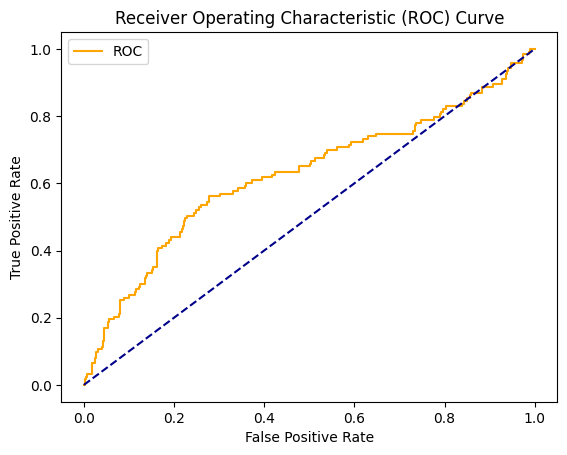

AUC-ROC : 0.623902870328438


In [39]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = model_LR.predict_proba(x_test)
probs = probs[:, 1]
lrauc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",lrauc)

In [40]:
nb = GaussianNB().fit(x_train, y_train)

nb_pred = nb.predict(x_test)
print(nb_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [41]:
print(confusion_matrix(y_test, nb_pred))
print(round(accuracy_score(y_test, nb_pred),2)*100)

[[368   9]
 [118   5]]
75.0


In [42]:
nbacc = accuracy_score(y_test, nb_pred)
nbf1score = f1_score(y_test, nb_pred)
nbrecall = recall_score(y_test, nb_pred)
nbbal = balanced_accuracy_score(y_test, nb_pred)

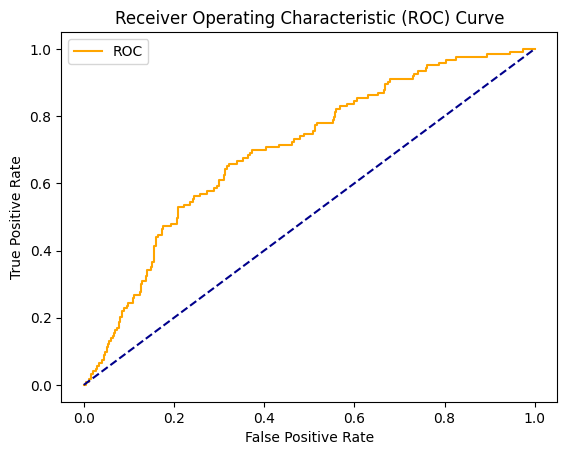

AUC-ROC : 0.6990576006555822


In [43]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = nb.predict_proba(x_test)
probs = probs[:, 1]
nbauc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",nbauc)

In [44]:
dtc = DecisionTreeClassifier().fit(x_train, y_train)

dtc_pred = dtc.predict(x_test)
print(dtc_pred)

[0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0
 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 1 0 1 0 0 1 0 0 0 

In [45]:
print(confusion_matrix(y_test, dtc_pred))
print(round(accuracy_score(y_test, dtc_pred),2)*100)

[[323  54]
 [ 82  41]]
73.0


In [46]:
dtcacc = accuracy_score(y_test, dtc_pred)
dtcf1score = f1_score(y_test, dtc_pred)
dtcrecall = recall_score(y_test, dtc_pred)
dtcbal = balanced_accuracy_score(y_test, dtc_pred)

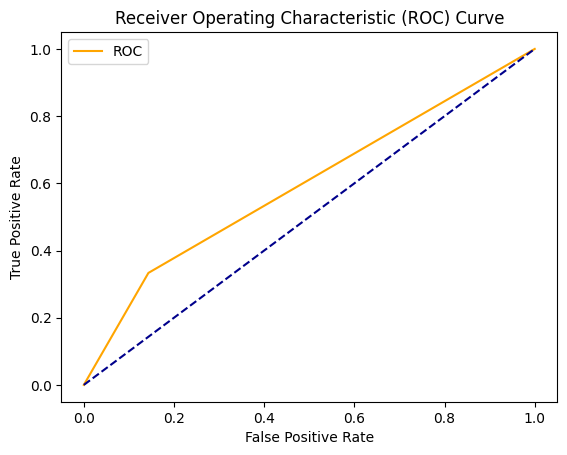

AUC-ROC : 0.595048629531388


In [47]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = dtc.predict_proba(x_test)
probs = probs[:, 1]
dtcauc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",dtcauc)

In [48]:
rfc = RandomForestClassifier().fit(x_train, y_train)

rfc_pred = rfc.predict(x_test)
print(rfc_pred)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 

In [49]:
print(confusion_matrix(y_test, rfc_pred))
print(round(accuracy_score(y_test, rfc_pred),2)*100)

[[373   4]
 [108  15]]
78.0


In [50]:
rfcacc = accuracy_score(y_test, rfc_pred)
rfcf1score = f1_score(y_test, rfc_pred)
rfcrecall = recall_score(y_test, rfc_pred)
rfcbal = balanced_accuracy_score(y_test, rfc_pred)

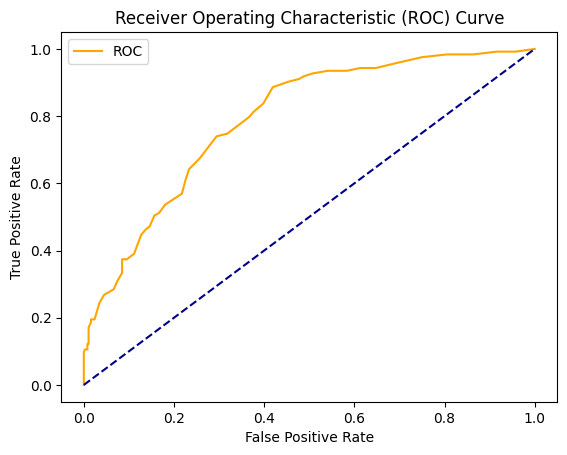

AUC-ROC : 0.7906881456082465


In [51]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = rfc.predict_proba(x_test)
probs = probs[:, 1]
rfcauc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",rfcauc)

In [52]:
svc = SVC(probability=True)

In [53]:
svc.fit(x_train, y_train)

svc_pred = svc.predict(x_test)
print(svc_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [54]:
print(confusion_matrix(y_test, svc_pred))
print(round(accuracy_score(y_test, svc_pred),2)*100)

[[377   0]
 [123   0]]
75.0


In [55]:
svcacc = accuracy_score(y_test, svc_pred)
svcf1score = f1_score(y_test, svc_pred)
svcrecall = recall_score(y_test, svc_pred)
svcbal = balanced_accuracy_score(y_test, svc_pred)

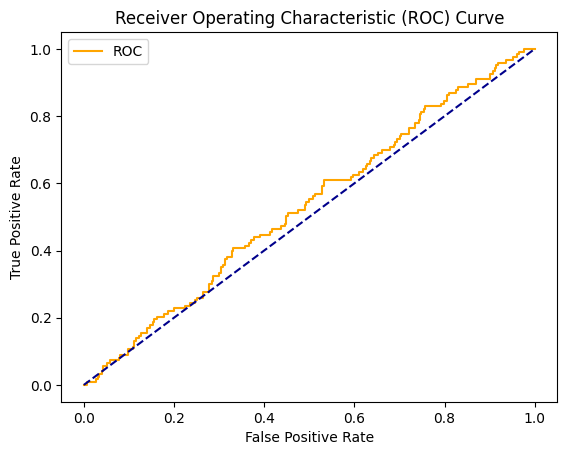

AUC-ROC : 0.5314097172801966


In [56]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = svc.predict_proba(x_test)
probs = probs[:, 1]
svcauc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",svcauc)

In [57]:
knn = KNeighborsClassifier().fit(x_train, y_train)

knn_pred = knn.predict(x_test)
print(knn_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [58]:
print(confusion_matrix(y_test, knn_pred))
print(round(accuracy_score(y_test, knn_pred), 2) * 100)

[[348  29]
 [101  22]]
74.0


In [59]:
knnacc = accuracy_score(y_test, knn_pred)
knnf1score = f1_score(y_test, knn_pred)
knnrecall = recall_score(y_test, knn_pred)
knnbal = balanced_accuracy_score(y_test, knn_pred)

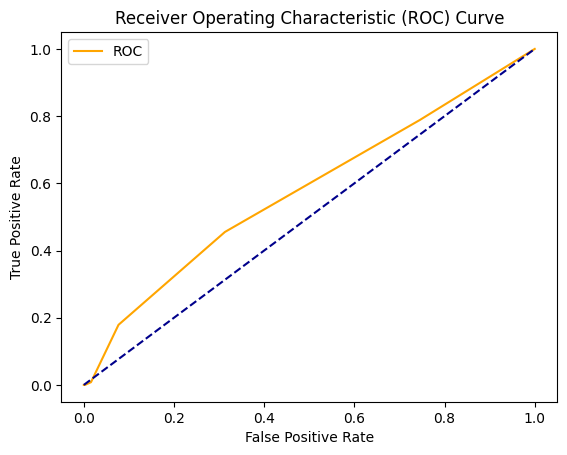

AUC-ROC: 0.5772465549589183


In [60]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = knn.predict_proba(x_test)
probs = probs[:, 1]
knn_auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC:", knn_auc)

Creating a list of tuples named 'models', where each tuple represents a model along with its evaluation metrics.

Evaluation metrics:
    1. accuracy_score: Ratio of correctly predicted instances to the total instances.
    2. recall_score: Ratio of true positives to the sum of true positives and false negatives.
    3. f1_score: Harmonic mean of precision and recall. It balances precision and recall and is useful when there is an uneven class distribution.
    4. balanced_accuracy_score: adjusts the accuracy metric by accounting for the imbalance in the classes. It is the average of recall obtained on each class.
    5. roc_auc_score: Computes the Area Under the ROC Curve (ROC AUC), which quantifies the overall performance of a binary classification model based on its ability to discriminate between positive and negative classes (in this case, Is_lead and No_Lead).

In [61]:
models = [('Logistic Regression', logacc, logf1score, logrecall, logbal, lrauc),
          ('Naive_Bayes', nbacc, nbf1score, nbrecall, nbbal, nbauc),
          ('Decision TreeClassifier', dtcacc, dtcf1score, dtcrecall, dtcbal, dtcauc),
          ('Random Forest Classifier', rfcacc, rfcf1score, rfcrecall, rfcbal, rfcauc),
          ('SVC', svcacc, svcf1score, svcrecall, svcbal, svcauc),
          ('KNN', knnacc, knnf1score, knnrecall, knnbal, knn_auc)]

In [62]:
# creating a dataframe
predict = pd.DataFrame(models, columns=['Model', 'Accuracy', 'F1-Score', 'Recall', 'Balanced Accuracy', 'AUC-ROC'])
predict

,Model,Accuracy,F1-Score,Recall,Balanced Accuracy,AUC-ROC
0,Logistic Regression,0.756,0.164384,0.097561,0.534192,0.623903
1,Naive_Bayes,0.746,0.072993,0.040650,0.508389,0.699058
2,Decision TreeClassifier,0.728,0.376147,0.333333,0.595049,0.595049
3,Random Forest Classifier,0.776,0.211268,0.121951,0.555671,0.790688
4,SVC,0.754,0.000000,0.000000,0.500000,0.531410
5,KNN,0.740,0.252874,0.178862,0.550969,0.577247


In [63]:
cm = sns.light_palette("blue", as_cmap=True)
s = predict.style.background_gradient(cmap=cm)
s

,Model,Accuracy,F1-Score,Recall,Balanced Accuracy,AUC-ROC
0,Logistic Regression,0.756000,0.164384,0.097561,0.534192,0.623903
1,Naive_Bayes,0.746000,0.072993,0.040650,0.508389,0.699058
2,Decision TreeClassifier,0.728000,0.376147,0.333333,0.595049,0.595049
3,Random Forest Classifier,0.776000,0.211268,0.121951,0.555671,0.790688
4,SVC,0.754000,0.000000,0.000000,0.500000,0.531410
5,KNN,0.740000,0.252874,0.178862,0.550969,0.577247


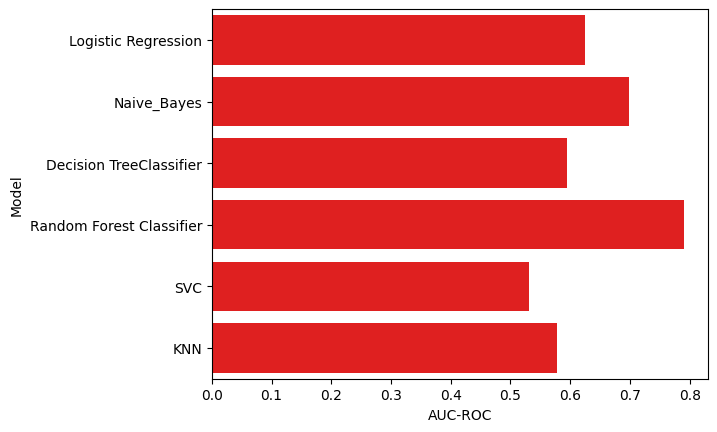

In [64]:
ax = sns.barplot(y="Model", x="AUC-ROC", data=predict, color="red")

In [65]:
# finding the best model based on overall perormance of the moels.
best_model = predict.loc[predict['AUC-ROC'] == predict['AUC-ROC'].max()]
print("Best Model for Predicting Leads:")
best_model

Best Model for Predicting Leads:


,Model,Accuracy,F1-Score,Recall,Balanced Accuracy,AUC-ROC
3,Random Forest Classifier,0.776,0.211268,0.121951,0.555671,0.790688


Save the trained Random Forest Classifier (rfc) model to a file ('rfc_model1.pkl') for future use, allowing it to be easily reloaded and used for predictions without needing to retrain the model.

In [66]:
import joblib
joblib.dump(rfc, 'rfc_model2.pkl')

['rfc_model2.pkl']

Importing the testing data.

In [67]:
testing_data = pd.read_csv("E:/Engineering/TnP/Projects/DataScience/CreditCardLead/dataset/test_mSzZ8RL.csv")

In [68]:
testing_data['Serial_Number'] = range(1, len(testing_data) + 1)

In [69]:
testing_data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Serial_Number
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No,1
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No,2
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No,3
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No,4
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No,5
...,...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes,105308
105308,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No,105309
105309,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No,105310
105310,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes,105311


In [70]:
testing_data.describe()

,Age,Vintage,Avg_Account_Balance,Serial_Number
count,105312.000000,105312.000000,1.053120e+05,105312.000000
mean,43.871002,46.842819,1.134195e+06,52656.500000
std,14.872890,32.273634,8.662430e+05,30401.100112
min,24.000000,7.000000,2.259700e+04,1.000000
25%,30.000000,20.000000,6.039822e+05,26328.750000
50%,43.000000,32.000000,8.966345e+05,52656.500000
75%,54.000000,73.000000,1.371598e+06,78984.250000
max,85.000000,135.000000,9.908858e+06,105312.000000


In [71]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
 10  Serial_Number        105312 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 8.8+ MB


In [72]:
testing_data_dup = testing_data.head(100000)
testing_data_dup

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Serial_Number
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No,1
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No,2
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No,3
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No,4
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No,5
...,...,...,...,...,...,...,...,...,...,...,...
99995,ZZNW9VKY,Male,63,RG284,Other,X3,116,No,2477110,Yes,99996
99996,MREGM6QS,Male,52,RG254,Other,X3,57,Yes,2648284,Yes,99997
99997,43JTYCXX,Male,32,RG250,Salaried,X1,32,No,1038496,No,99998
99998,NWDSFHZQ,Male,28,RG254,Salaried,X1,27,Yes,4654967,No,99999


In [73]:
testing_data_dup.shape

(100000, 11)

Converting categorical variabkles into numerical variables.

In [74]:
testing_data_dup = pd.get_dummies(testing_data_dup, drop_first=True)

Comaparing the columns in Training and Testing dataset

In [75]:
missing_cols = set(x_train.columns) - set(testing_data.columns)
for col in missing_cols:
    testing_data_dup[col] = 0
testing_data_dup = testing_data_dup[x_train.columns]

Loading the pre-trained model to apply it over the testing data.

In [76]:
rfc_load = joblib.load('rfc_model2.pkl')

In [77]:
final_pred = rfc_load.predict(testing_data_dup)
final_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Saving the result into a .csv file.

In [78]:
submission = pd.DataFrame({'Serial_Number': testing_data_dup['Serial_Number'], 'Is_Lead': final_pred})
submission.to_csv("E:/Engineering/TnP/Projects/DataScience/CreditCardLead/Submissionfinal.csv")

In [79]:
print(submission)

       Serial_Number  Is_Lead
0                  1        0
1                  2        0
2                  3        0
3                  4        0
4                  5        0
...              ...      ...
99995          99996        1
99996          99997        0
99997          99998        0
99998          99999        0
99999         100000        0

[100000 rows x 2 columns]


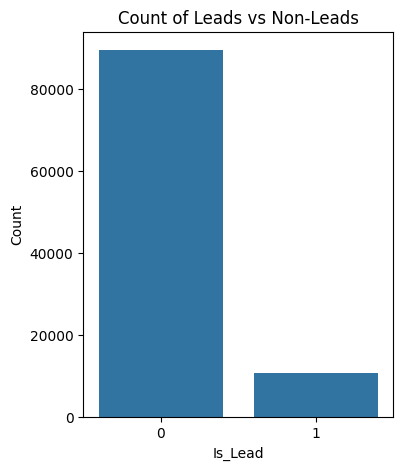

In [80]:
plt.figure(figsize=(4, 5))
sns.countplot(data=submission, x='Is_Lead')
plt.title('Count of Leads vs Non-Leads')
plt.xlabel('Is_Lead')
plt.ylabel('Count')
plt.show()

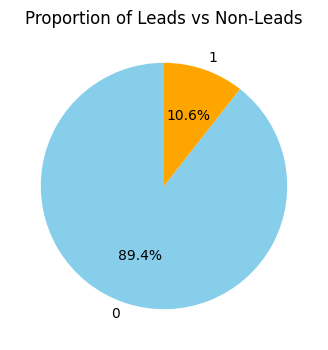

In [81]:
plt.figure(figsize=(4, 4))
submission['Is_Lead'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Proportion of Leads vs Non-Leads')
plt.ylabel('')
plt.show()

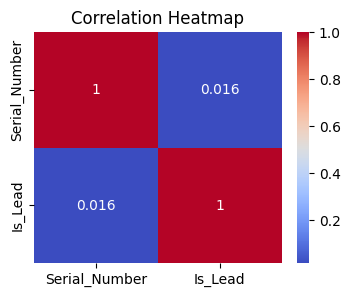

In [82]:
plt.figure(figsize=(4, 3))
corr_matrix = submission.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()